## *Project Description* :

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

## *Data Description* 

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

- Store - the store number

- Date - the week of sales

- Weekly_Sales -  sales for the given store

- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

- Temperature - Temperature on the day of sale

- Fuel_Price - Cost of fuel in the region

- CPI – Prevailing consumer price index

- Unemployment - Prevailing unemployment rate

## Importing the Library

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [70]:
walmart_df = pd.read_csv("Walmart_Store_sales.csv")

In [71]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## Basic Information about the dataset

In [72]:
# shape of the dataset

walmart_df.shape

(6435, 8)

#### *The Walmart dataset have 6435 records spread around 8 Features

In [73]:
# General info

walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


- There are No Null value in the dataset
- We have 5 Float variable, 2 int and 1 obj
- Although Date should be the datetime variable, we'll see about that later


In [74]:
# Descriptive statistics about the dataset
walmart_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [75]:
walmart_df['Holiday_Flag'].sum()

450

- weekly Sales have a means of 1.04million with min Sales reporting as 209982 and max Sales of $3.8 mn
- Temperature ranges from -2 to 100 with mean temp as 60
- Fuel price ranges from 2.47 to 4.46 with mean fuel price of 3.3

## EDA for Walmart dataset

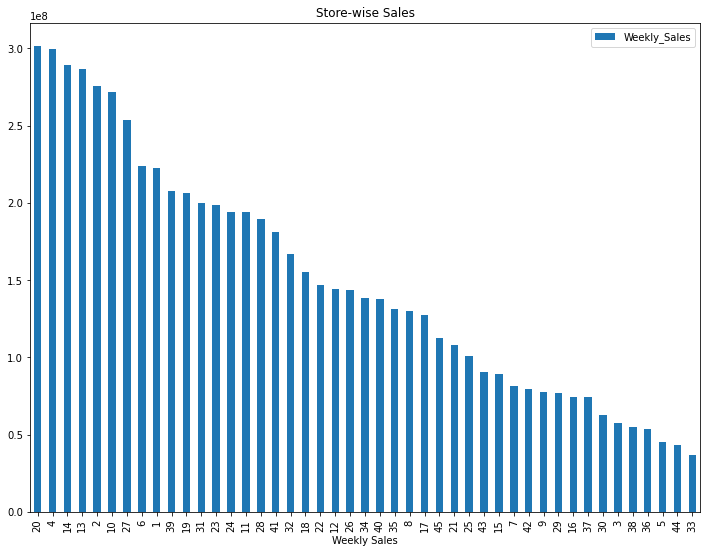

In [76]:
# Store with max_Sales

walmart_df.groupby(by='Store').agg({'Weekly_Sales':'sum'}).sort_values(by='Weekly_Sales', ascending=False).plot(kind='bar', 
                                                                                                               figsize=(12,9))
plt.title("Store-wise Sales")
plt.savefig('Store-wise Sales.png')
plt.xlabel("Weekly Sales")
plt.show()

- As we can see that store# 20, 4,14, 13 have the highest sales
- And Store# 33,44,5,36,38 have lowest Sales

In [77]:
# Which store has maximum standard deviation

Store_sales = walmart_df.groupby(by='Store')['Weekly_Sales'].agg(['std', 'mean']).reset_index()

In [78]:
Store_sales

,Store,std,mean
0,1,155980.767761,1.555264e+06
1,2,237683.694682,1.925751e+06
2,3,46319.631557,4.027044e+05
3,4,266201.442297,2.094713e+06
4,5,37737.965745,3.180118e+05
5,6,212525.855862,1.564728e+06
6,7,112585.469220,5.706173e+05
7,8,106280.829881,9.087495e+05
8,9,69028.666585,5.439806e+05
9,10,302262.062504,1.899425e+06


In [79]:
Store_sales['coef_mean_to_std'] = Store_sales['std']/Store_sales['mean']

In [80]:
Store_sales.head()

,Store,std,mean,coef_mean_to_std
0,1,155980.767761,1.555264e+06,0.100292
1,2,237683.694682,1.925751e+06,0.123424
2,3,46319.631557,4.027044e+05,0.115021
3,4,266201.442297,2.094713e+06,0.127083
4,5,37737.965745,3.180118e+05,0.118668


In [81]:
Store_sales.sort_values(by=['std'],ascending=False)[['Store','std']]

,Store,std
13,14,317569.949476
9,10,302262.062504
19,20,275900.562742
3,4,266201.442297
12,13,265506.995776
22,23,249788.038068
26,27,239930.135688
1,2,237683.694682
38,39,217466.454833
5,6,212525.855862


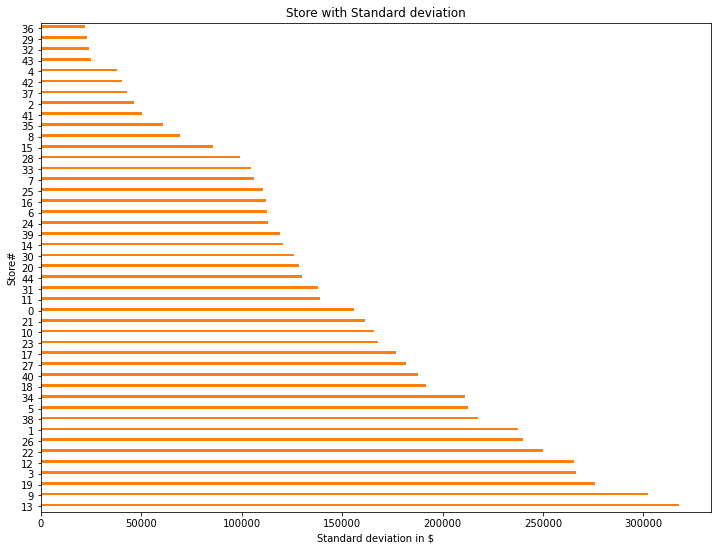

In [82]:
Store_sales.sort_values(by=['std'],ascending=False)[['Store','std']].plot(kind='barh', figsize=(12,9),legend=False)
plt.title("Store with Standard deviation")
plt.xlabel("Standard deviation in $")
plt.ylabel("Store#")
plt.savefig('Store-wise Std')
plt.show()

As we can see that Store 13 have the maximum Standard deviation which we can check with the original dataset

In [83]:
# Which store/s has good quarterly growth rate in Q3’2012

In [84]:
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'])

In [85]:
from datetime import date

In [86]:
walmart_df['Quarter'] = pd.PeriodIndex(walmart_df['Date'], freq='Q')

In [87]:
quarter_wise_sales = walmart_df.groupby(['Store','Quarter']).agg({'Weekly_Sales':'sum'}).reset_index()

In [88]:
Q3_sales = quarter_wise_sales[quarter_wise_sales['Quarter'] == '2012Q3'].groupby('Store')['Weekly_Sales'].sum().reset_index()
Q2_sales = quarter_wise_sales[quarter_wise_sales['Quarter'] == '2012Q2'].groupby('Store')['Weekly_Sales'].sum().reset_index()

In [89]:
Q3_sales = pd.merge(Q3_sales,Q2_sales, on=Q3_sales['Store'])

In [90]:
Q3_sales.head()

,key_0,Store_x,Weekly_Sales_x,Store_y,Weekly_Sales_y
0,1,1,18633209.98,1,21036965.58
1,2,2,22396867.61,2,25085123.61
2,3,3,4966495.93,3,5562668.16
3,4,4,25652119.35,4,28384185.16
4,5,5,3880621.88,5,4427262.21


In [91]:
Q3_sales = Q3_sales.drop(['Store_x','Store_y'],axis=1)
#Q3_sales = Q3_sales.rename({'Weekly_Sales_x':'Q3_Sales'},axis=1)
#Q3_sales = Q3_sales.rename({'Weekly_Sales_y':'Q2_Sales'},axis=1)

In [92]:
Q3_sales = Q3_sales.rename({'Weekly_Sales_x':'Q3_Sales'},axis=1)
Q3_sales = Q3_sales.rename({'Weekly_Sales_y':'Q2_Sales'},axis=1)

In [93]:
Q3_sales.head()

,key_0,Q3_Sales,Q2_Sales
0,1,18633209.98,21036965.58
1,2,22396867.61,25085123.61
2,3,4966495.93,5562668.16
3,4,25652119.35,28384185.16
4,5,3880621.88,4427262.21


In [94]:
Q3_sales['perc_growth'] = np.round((Q3_sales['Q3_Sales'] - Q3_sales['Q2_Sales'])/Q3_sales['Q2_Sales']*100,2)

In [95]:
Q3_sales.sort_values(by='perc_growth', ascending=False).head()

,key_0,Q3_Sales,Q2_Sales,perc_growth
15,16,6441311.11,6626133.44,-2.79
6,7,7322393.92,7613593.92,-3.82
34,35,10252122.68,10753570.97,-4.66
25,26,12417575.35,13218289.66,-6.06
38,39,18899955.17,20191585.63,-6.40


As we can see that we saw a dip in 2012Q3 and all the store captures the negetive growth rate over previous quarter
but least neg growth rate was done by Store# 15

In [96]:
#Some holidays have a negative impact on sales. 
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

mean_non_holiday_sales = np.round(walmart_df[walmart_df['Holiday_Flag'] == 0]['Weekly_Sales'].mean(),2)

In [97]:
mean_non_holiday_sales

1041256.38

In [98]:
holiday_sales = walmart_df[walmart_df['Holiday_Flag']==1]

In [99]:
holiday_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010Q4
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010Q4
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010Q4
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011Q4
...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,2011Q3
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,2011Q4
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,2011Q4
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424,2012Q4


In [100]:
holiday_sales.groupby(by='Date')['Weekly_Sales'].agg(Avg='mean').index.tolist()

[Timestamp('2010-10-09 00:00:00'),
 Timestamp('2010-11-26 00:00:00'),
 Timestamp('2010-12-02 00:00:00'),
 Timestamp('2010-12-31 00:00:00'),
 Timestamp('2011-09-09 00:00:00'),
 Timestamp('2011-11-02 00:00:00'),
 Timestamp('2011-11-25 00:00:00'),
 Timestamp('2011-12-30 00:00:00'),
 Timestamp('2012-07-09 00:00:00'),
 Timestamp('2012-10-02 00:00:00')]

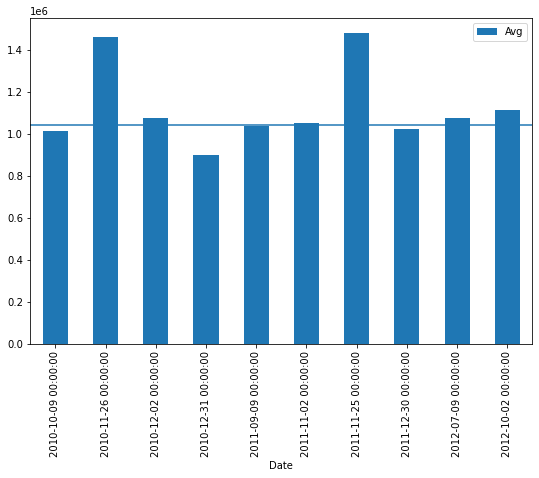

In [101]:
holiday_sales.groupby(by='Date')['Weekly_Sales'].agg(Avg='mean').plot(kind='bar',legend='off',figsize=(9,6))
plt.axhline(y=mean_non_holiday_sales)
plt.savefig("holiday season sales.png")
plt.show()

As per above graph Following holidays have more sales than the non holiday mean
- ThanksGiving - 2010
- Superbowl - 2010
- ThanksGiving - 2011
- Labour Day - 2012
- Superbowl - 2012

In [102]:
#Provide a monthly and semester view of sales in units and give insights

walmart_df['Month'] = walmart_df.Date.dt.month
walmart_df['Year'] = walmart_df.Date.dt.year

In [103]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q2,5,2010


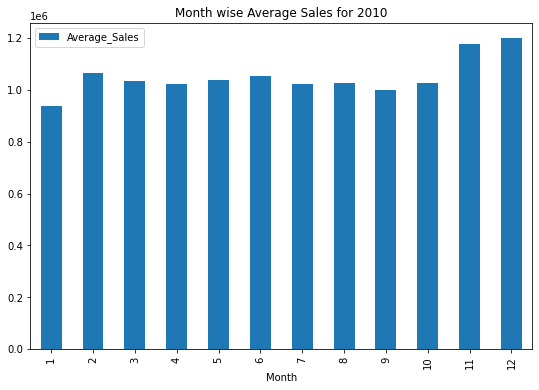

In [104]:
walmart_df[walmart_df['Year'] == 2010].groupby('Month')['Weekly_Sales'].agg(Average_Sales='mean').plot(kind='bar', figsize=(9,6))
plt.title("Month wise Average Sales for 2010")
plt.savefig("2010_Month_avg_sales.png")
plt.show()

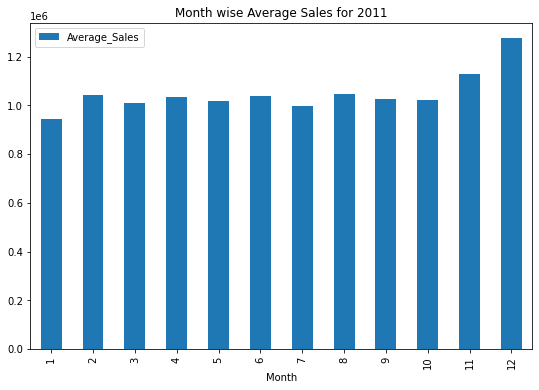

In [105]:
walmart_df[walmart_df['Year'] == 2011].groupby('Month')['Weekly_Sales'].agg(Average_Sales='mean').plot(kind='bar', figsize=(9,6))
plt.title("Month wise Average Sales for 2011")
plt.savefig("2011_Month_avg_sales.png")
plt.show()

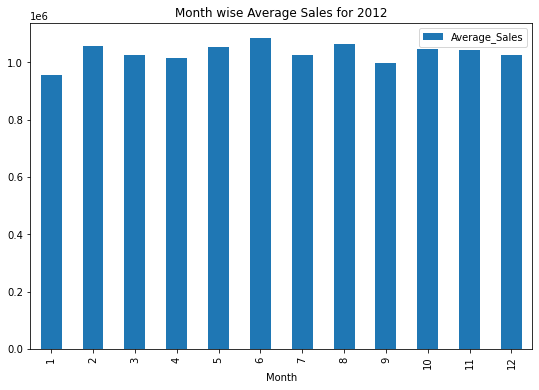

In [106]:
walmart_df[walmart_df['Year'] == 2012].groupby('Month')['Weekly_Sales'].agg(Average_Sales='mean').plot(kind='bar', figsize=(9,6))
plt.title("Month wise Average Sales for 2012")
plt.savefig("2012_Month_avg_sales.png")
plt.show()

In 2010 and 2011 we see that Sales peak at the feb and nov and dec during the holiday season and superbowl


## Statistical Model

In [107]:
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q2,5,2010


Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [108]:
walmart_df['days'] = pd.DatetimeIndex(walmart_df['Date']).day
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Month,Year,days
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q2,5,2010,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4,12,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1,2,2010,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1,2,2010,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q2,5,2010,3


<AxesSubplot:xlabel='Weekly_Sales'>

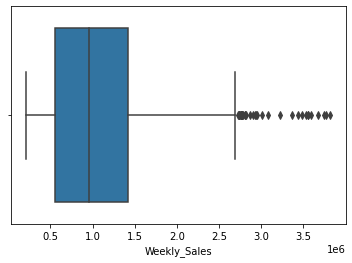

In [109]:
# Checking for outliers in target variable


sns.boxplot(walmart_df['Weekly_Sales'])

As we can see that there are many outliers that lie outside of the range

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

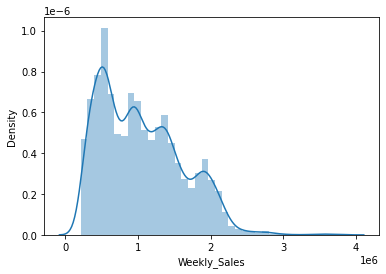

In [110]:
sns.distplot(walmart_df.Weekly_Sales)

Now let's see the outliers in feature variables

In [111]:
walmart_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Quarter', 'Month', 'Year',
       'days'],
      dtype='object')

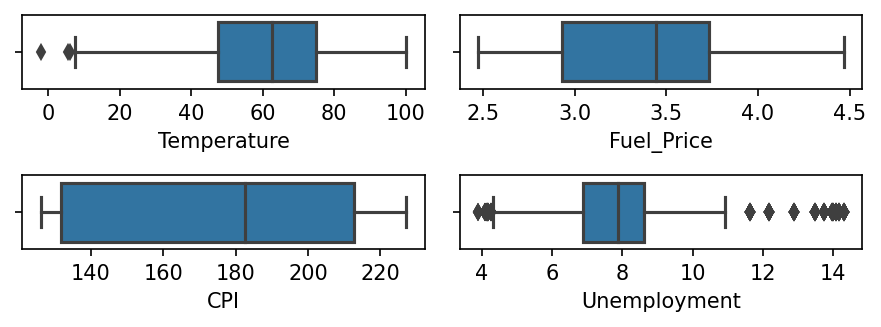

In [112]:
features_list = 'Temperature, Fuel_Price, CPI, Unemployment'.split(", ")

plt.figure(dpi=150)
count = 1
for feature in features_list:
    plt.subplot(4,2,count)
    sns.boxplot(walmart_df[feature])
    count += 1
plt.tight_layout()
plt.show()

## Statistical Model

For Store 1 – Build  prediction models to forecast demand

In [114]:
# filtering the store-1 data

store1_df = walmart_df[walmart_df['Store'] == 1]

In [122]:
#Utilize variables like date and restructure dates as 1 for 5 Feb 2010
store1_df = store1_df.drop('days', axis=1)

In [136]:
store1_df.Date.sort_values()

34    2010-01-10
8     2010-02-04
21    2010-02-07
2     2010-02-19
3     2010-02-26
         ...    
131   2012-10-08
141   2012-10-19
142   2012-10-26
118   2012-11-05
140   2012-12-10
Name: Date, Length: 143, dtype: datetime64[ns]

In [145]:
store1_df['days'] = (store1_df['Date'] - store1_df['Date'].min())+dt.timedelta(days=1)

In [147]:
store1_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,Month,Year,days
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q2,5,2010,113 days
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4,12,2010,327 days
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1,2,2010,41 days
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1,2,2010,48 days
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q2,5,2010,114 days


In [144]:
store1_df.Date.min()

Timestamp('2010-01-10 00:00:00')

In [149]:
# drop the unnecessary columns like Store, Date, quater, month, year, holiday_flag

X = store1_df.drop(['Store','Date', 'Holiday_Flag','Quarter','Month','Year'], axis=1)
y = store1_df['Weekly_Sales']

In [155]:
X = X.drop(['days'], axis=1)

In [156]:
# scaling the predictor data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_sc = sc.fit_transform(X)

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=21)

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print("MAE: {}" .format(mean_absolute_error(y_test, y_pred)))
print("RMSE: {}" .format(mean_squared_error(y_test, y_pred)))


MAE: 110623.17542364592
RMSE: 22715349772.518513


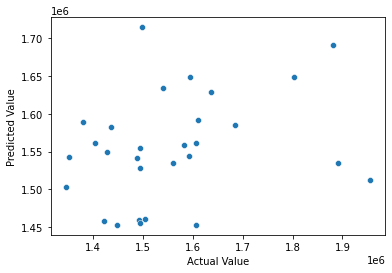

In [163]:
sns.scatterplot(x= y_test, y= y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [164]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred_tree = tree_reg.predict(X_test)

print("MAE: {}" .format(mean_absolute_error(y_test, y_pred_tree)))
print("RMSE: {}" .format(mean_squared_error(y_test, y_pred_tree)))


MAE: 146542.42137931037
RMSE: 45858350942.26115


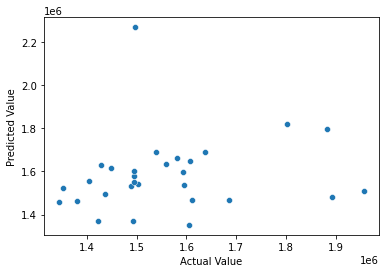

In [165]:
sns.scatterplot(x=y_test, y=y_pred_tree)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [166]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

y_pred_forest = forest_reg.predict(X_test)

print("MAE: {}" .format(mean_absolute_error(y_test, y_pred_forest)))
print("RMSE: {}" .format(mean_squared_error(y_test, y_pred_forest)))


MAE: 110757.13500689648
RMSE: 25482738732.622448


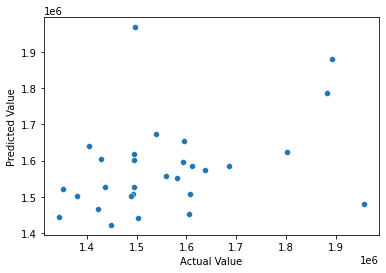

In [167]:
sns.scatterplot(x=y_test, y=y_pred_forest)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

Although the Random forest does perform better than most other model we cannot
sufficiently say that these predictor have better effect on the prediction